<a href="https://colab.research.google.com/github/virajvaidya/SRC_ANU_Sampling_1/blob/main/HomeworkW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

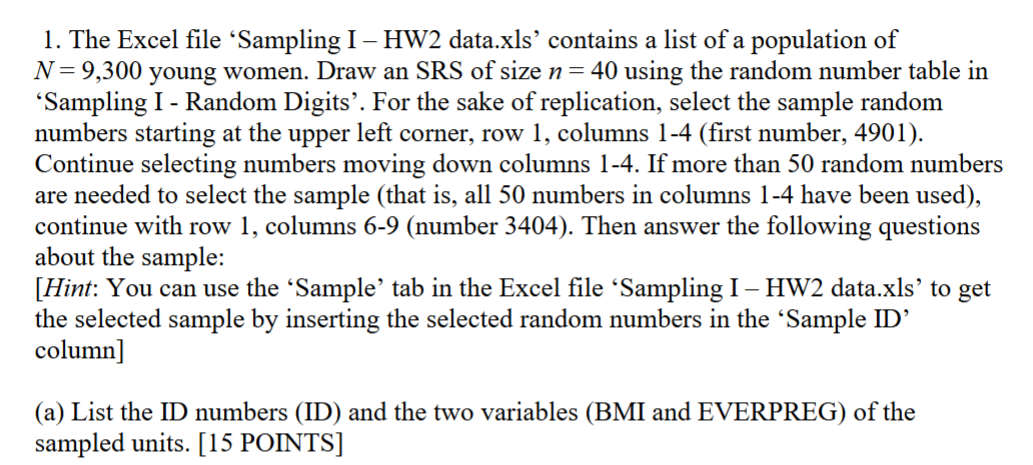

In [15]:
import pandas as pd
import numpy as np
import statistics as st
import itertools as it
from matplotlib import pyplot as plt


In [8]:
population = pd.read_excel('/content/drive/MyDrive/Sampling I - HW2 data.xls')
population

,ID,BMI,EVERPREG
0,1,22,0
1,2,32,1
2,3,19,1
3,4,21,1
4,5,21,1
...,...,...,...
9295,9296,28,1
9296,9297,38,1
9297,9298,40,1
9298,9299,26,1


# (a) List the ID numbers (ID) and the two variables (BMI and EVERPREG) of the sampled units. [15 POINTS]

Python is a 0-index language - so the first count starts with 0 and not 1, so in the following sample of n=40, the last observation is no. 39 for this reason.

In [9]:
sample40 = pd.read_csv('/content/drive/MyDrive/hw2sample.csv')
sample40

,Sample ID,BMI,EVERPREG
0,4901,21,1
1,3452,38,1
2,7961,45,1
3,5477,35,1
4,1225,23,1
5,3329,22,1
6,7508,26,1
7,6628,18,1
8,8457,27,1
9,5569,27,1


# (b) Estimate the mean Body Mass Index (BMI) and compare it to the population mean BMI. If they differ, give a brief explanation why. [10 POINTS]

In [10]:
popmean = st.mean(population['BMI'])
popmean

27.86784946236559

In [11]:
samplemean = st.mean(sample40['BMI'])
samplemean

27.225

# The population mean is 27.8678 and sample mean is 27.225 for the BMI columns in both dataframes.

# The slight variation in the means can be due to :

# 1. Sample size - Sample size is very small as compared to the population
# 2. Randomness  - The sample is randomly selected so there is a chance of randomly selecting elements that might not be completely representative of the population. Despite this, the means are very close anyway.
# 3. Outliers - Sample has not accounted for and corrected for potential outliers.

# (c) Estimate the element variance of the BMI, the sampling variance and standard error of the mean BMI using the sample data. [15 POINTS]

# (d) Compute a 95% confidence interval for the mean BMI using the sample data. [15 POINTS]



In [16]:
def analyse_bmi_variance(sample40):
    """
    Calculate various variance measures for BMI from sample data

    Parameters:
    sample40 (pandas.DataFrame): Sample dataset with BMI column

    Returns:
    dict: Dictionary containing variance measures and calculations
    """
    n = len(sample40)

    # 1. Element variance (sample variance of individual observations)
    element_variance = np.var(sample40['BMI'], ddof=1)  # ddof=1 for sample variance

    # 2. Sampling variance of the mean (variance of sample mean)
    # This is the element variance divided by sample size
    sampling_variance = element_variance / n

    # 3. Standard error of the mean
    # Square root of sampling variance
    standard_error = np.sqrt(sampling_variance)

    # Calculate mean for reference
    sample_mean = np.mean(sample40['BMI'])

    # Calculate 95% confidence interval
    confidence_interval = (
        sample_mean - 1.96 * standard_error,
        sample_mean + 1.96 * standard_error
    )

    return {
        'element_variance': element_variance,
        'sampling_variance': sampling_variance,
        'standard_error': standard_error,
        'sample_mean': sample_mean,
        'confidence_interval': confidence_interval,
        'sample_size': n
    }


In [17]:
results = analyse_bmi_variance(sample40)
results

{'element_variance': 62.076282051282085,
 'sampling_variance': 1.551907051282052,
 'standard_error': 1.2457556145898168,
 'sample_mean': 27.225,
 'confidence_interval': (24.78331899540396, 29.666681004596043),
 'sample_size': 40}

# **Results BMI :**

# Element variance : 62.076
# Sampling variance : 1.551
# Standard error : 1.245
# 95% Confidence intervals : Lower 24.7833, Upper 29.666


In [19]:
def analyse_pregnancy_proportion(sample40):
    """
    Calculate proportion of women who have been pregnant, with standard error
    and confidence interval

    Parameters:
    sample40 (pandas.DataFrame): Sample dataset with EVERPREG column (1 or 0)

    Returns:
    dict: Dictionary containing proportion statistics
    """
    # Calculate sample size
    n = len(sample40)

    # Calculate proportion (p̂)
    proportion = np.mean(sample40['EVERPREG'])

    # Calculate standard error for proportion
    # Formula: sqrt(p̂(1-p̂)/n)
    standard_error = np.sqrt((proportion * (1 - proportion)) / n)

    # Calculate 95% confidence interval
    # Formula: p̂ ± 1.96 * SE
    confidence_interval = (
        proportion - 1.96 * standard_error,
        proportion + 1.96 * standard_error
    )

    return {
        'proportion': proportion,
        'standard_error': standard_error,
        'confidence_interval': confidence_interval,
        'sample_size': n
    }


resultsPREG = analyse_pregnancy_proportion(sample40)


In [20]:
resultsPREG

{'proportion': 0.85,
 'standard_error': 0.05645794895318108,
 'confidence_interval': (0.7393424200517651, 0.9606575799482349),
 'sample_size': 40}

# **Results PREG** :
# Proportion : Assuming 1= woman has ever been pregnant, the proportion is 85%
# Standard error : 0.0564
# Confidence intervals 95% : Lower 0.7393 , Upper : 0.9606
# Interpretation : We can be 95% confident that the true proportion of women who have ever been pregnant falls between 73.93% and 96.06% in the sample taken of n=40.

# (f) If the sample size of an SRS from this population were increased from n = 40 to n = 100, what would be the estimated standard error of the mean BMI?

In [21]:
def estimate_new_SE(original_SE, n1=40, n2=100):
    """
    Calculate new standard error based on increased sample size

    Parameters:
    original_SE: Standard error from original sample (n=40)
    n1: Original sample size (40)
    n2: New sample size (100)
    """
    new_SE = original_SE * np.sqrt(n1/n2)
    return new_SE


In [22]:
original_SE = 0.0564
new_SE = estimate_new_SE(original_SE)
print(f"Original SE (n=40): {original_SE:.4f}")
print(f"New SE (n=100): {new_SE:.4f}")

Original SE (n=40): 0.0564
New SE (n=100): 0.0357


#If the sample were increased from n=40 to n=100, the standard error would shrink from 0.0564 to 0.0357. This makes sense intuitively because the larger the sample , the closer to the population so the error margins reduce.

# (g) What sample size n for an SRS from this population is needed to achieve a coefficient of variation of at most 0.025 for both the mean BMI and the proportion of women who have ever been pregnant? [15 POINTS]


# This question was confusing to understand, so I asked Claude (chatbot) to explain what we were looking for and to break it down for me, and once I understood that I wrote the following code to arrive at the answer:  

#We need to find sample sizes for both BMI and EVERPREG columns where coefficient of variance equal or less than 0.025.

#Coefficient of variance is SE/estimate (here mean)

# So we find the CV for both columns, and the mimnimum required sample size for both EVERPREG and BMI columns, and use the one which is the largest value of the two.

In [24]:
def calculate_required_sample_sizes(sample_df):
    # For BMI
    bmi_mean = np.mean(sample_df['BMI'])
    bmi_var = np.var(sample_df['BMI'], ddof=1)
    n_bmi = np.ceil(bmi_var / (0.025 * bmi_mean)**2)

    # For EVERPREG
    p = np.mean(sample_df['EVERPREG'])
    n_preg = np.ceil((1-p) / (0.025**2 * p))

    return {
        'n_bmi': n_bmi,
        'n_pregnancy': n_preg,
        'required_n': max(n_bmi, n_preg)
    }


In [25]:
calculate_required_sample_sizes(sample40)

{'n_bmi': 135.0, 'n_pregnancy': 283.0, 'required_n': 283.0}

#The minimum sample size for column BMI required for achieving an CV of maximum 0.025 is n= 135.

#The minimum sample size for column EVERPREG required for achieving an CV of maximum 0.025 is n= 283.

#So a minimum sample size required to get a CV of max 0.025 would be the highest of the two, 135 and 283. Therefore, we need an n=283 to satisfy this condition.


#2. Please, in relation to this Homework 2, report:
#(a) How long did you spend (in HH:MM) on this assignment? 03:00
#(b) On a scale of 1 to 10, where 1 is “very easy” and 10 is “very difficult”, how would you rate this assignment? Answer - 6.5/10
